In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.concat(pd.read_excel('Excel_updatedCountySheet.xlsx', sheet_name=None), ignore_index=True)

In [3]:
# First 5 rows
df.head(5)

,Unnamed: 0,TEACHER_SALARY,YEARS_TAUGHT,LASTNAME,FULL_TIME,CLASSES_TAUGHT,JOBCODE1,HIGHESTCOMPLETED,COUNTY_CODE
0,6,55996.0,NaN,Gibbons,1,1.0,1001,NaN,1
1,12,86539.0,19.0,Adair,1,5.0,1001,Masters,1
2,13,64357.0,9.0,Roberts,1,5.0,1001,Bachelors,1
3,14,90308.0,19.0,Horner,1,5.0,1001,Doctoral,1
4,15,67401.0,12.0,Broomhead,1,5.0,1106,Bachelors,1


In [4]:
# Describe the dataset
df.describe()

,Unnamed: 0,TEACHER_SALARY,YEARS_TAUGHT,FULL_TIME,CLASSES_TAUGHT,JOBCODE1,COUNTY_CODE
count,42828.000000,42824.000000,42649.00000,42828.0,42787.000000,42828.000000,42828.000000
mean,71907.297446,72857.705422,12.48728,1.0,4.117092,1376.138858,21.466984
std,42371.430752,17091.961561,8.45809,0.0,2.608526,502.154701,16.067517
min,6.000000,18500.000000,0.00000,1.0,1.000000,1001.000000,1.000000
25%,35489.750000,58500.000000,5.00000,1.0,1.000000,1001.000000,9.000000
50%,70694.500000,70025.000000,12.00000,1.0,5.000000,1103.000000,21.000000
75%,108432.250000,85376.250000,17.00000,1.0,5.000000,1901.000000,29.000000
max,145130.000000,145798.000000,50.00000,1.0,40.000000,2391.000000,80.000000


## Cleanup

In [5]:
df.drop(df.columns[0], axis=1, inplace=True)

## Translate County Codes to County Names

In [6]:
# The dataset only stores COUNTY_CODE, this dictionary will be useful to plot categorical Data
countyNameCode = {
    1: 'Atlantic',
    3: 'Bergen',
    5: 'Burlington',
    7: 'Camden',
    9: 'Cape May',
    11: 'Cumberland',
    13: 'Essex',
    15: 'Gloucester',
    17: 'Hudson',
    19: 'Hunterdon',
    21: 'Mercer',
    23: 'Middlesex',
    25: 'Monmouth',
    27: 'Morris', 
    29: 'Ocean', 
    31: 'Passaic', 
    33: 'Salem', 
    35: 'Somerset', 
    37: 'Sussex',
    39: 'Union',
    41: 'Warren'
}

In [7]:
def codeToName(code):
    return countyNameCode.get(code)

In [8]:
df['COUNTY'] = df.apply(lambda x: codeToName(x['COUNTY_CODE']), axis=1)

## EDA using Seaborn

In [ ]:
# Configurations for visualizations

In [ ]:
sns.set(style='whitegrid', rc={"figure.figsize": [20, 8]})

### Teacher count by county

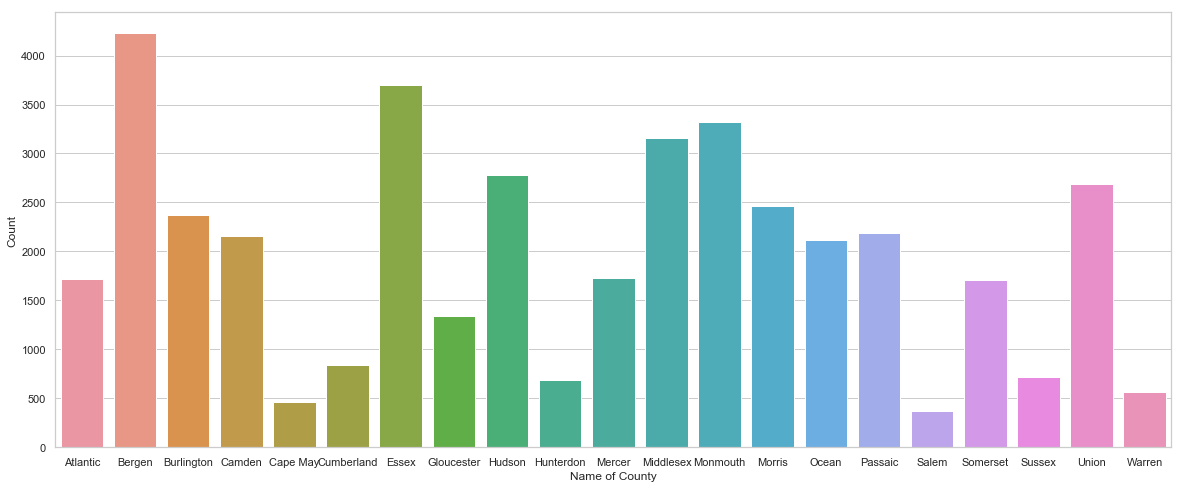

In [ ]:
sns.countplot(df['COUNTY']).set(xlabel='Name of County', ylabel='Count');

### Box plot of Teacher Salary vs County

This chart will allow us to comapre averages, max and minimum salaries of all counties.

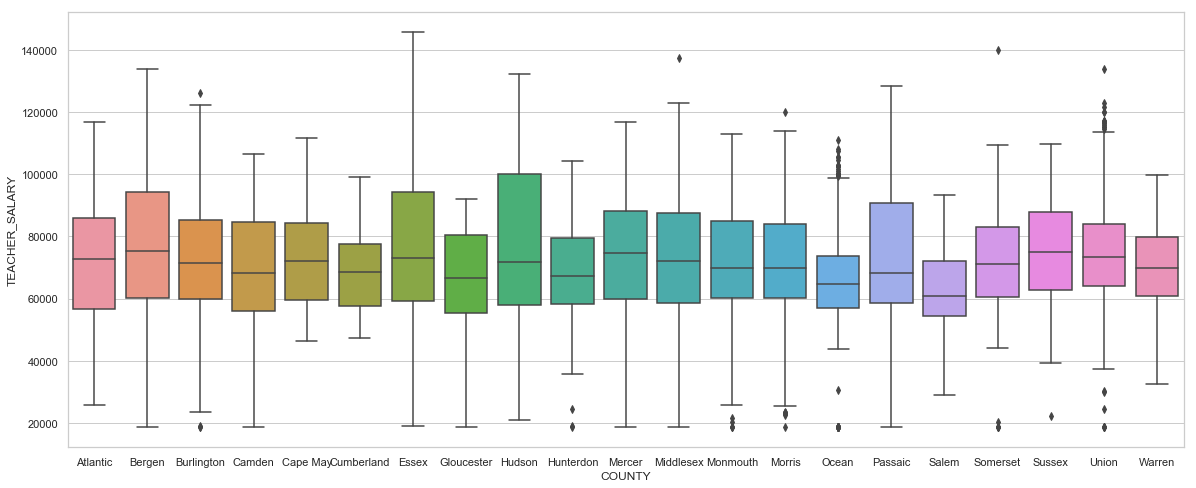

In [ ]:
sns.boxplot(x="COUNTY", y="TEACHER_SALARY",data=df)

## Plotting heatmap to see if any columns are correlated

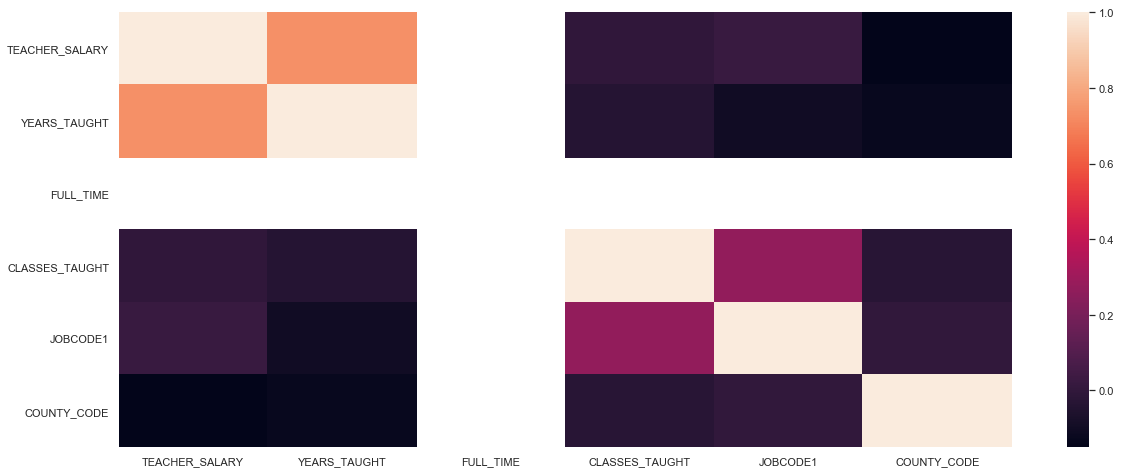

In [ ]:
sns.heatmap(df.corr())

#### It seems YEARS_TAUGHT and TEACHER_SALARY are correlated.

## Years taught distribution

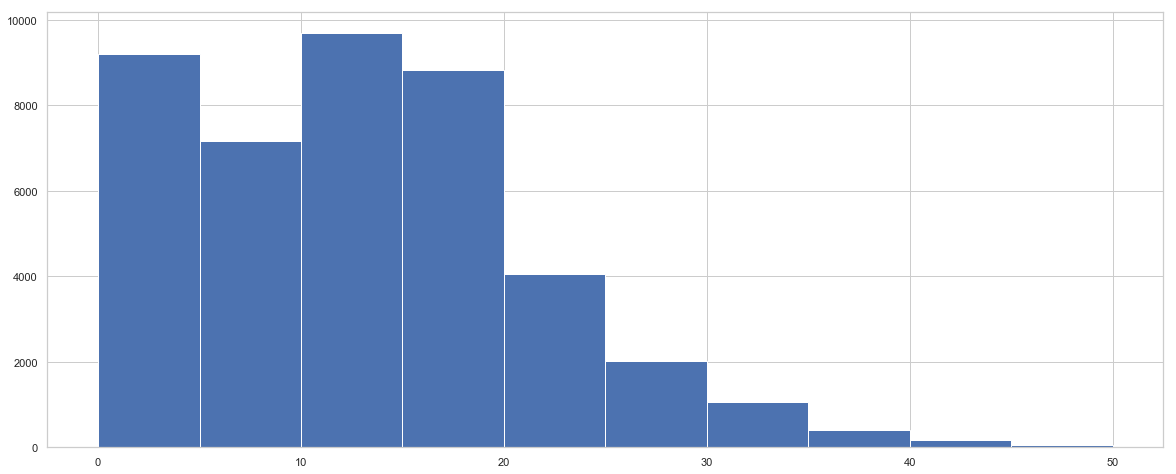

In [ ]:
df['YEARS_TAUGHT'].hist()

In [ ]:
df['HIGHESTCOMPLETED'].hist()

In [ ]:
sns.pairplot(df)